In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.drop(columns=['2022'])
y = df['2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)

predictions_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, predictions_xgb)
print("Mean Absolute Error for XGBoost model:", mae_xgb)

model_xgb.fit(X, y)
features_2022 = df[df.columns.difference(['2022'])].tail(366)

forecast_2022 = model_xgb.predict(features_2022)
print(forecast_2022)

Mean Absolute Error for XGBoost model: 845726.1790540541
[1298694.9    819765.75  1186258.6   2047270.5   1157794.4   1193765.8
 1189299.8    334830.84   773199.94  2619407.2   1595549.8   1470836.8
 1187132.8   1230786.4    442316.53  1466864.6    287073.44   234678.03
 1143381.5   1204283.5   2085903.5    997362.75  1131288.8    186638.53
 1174033.8   1158782.4    205107.98  1207401.2    181422.88  1635671.4
 1165645.9   1452241.6   1739400.6   1263135.5   1173158.8    604984.9
 1199457.2   1753466.9    226702.5   2381757.5    482219.4   1336817.
  828734.8    167355.14  1260074.9   1549060.6   1967696.1    996884.94
 1180927.8   1215312.8    766062.9    278921.47  2042269.9    866467.5
 1126993.8   3450641.2    148400.11  1931850.1   1199358.4   1240666.5
  435583.9   1191537.1   2469798.5   1171274.9   1188767.8   1253364.2
 1677409.4   2145541.5    442498.03  2598273.2   1760561.8    103124.484
  134575.16  1149260.9   1253986.    1125634.8   4012147.    1187804.2
 3056409.8    19

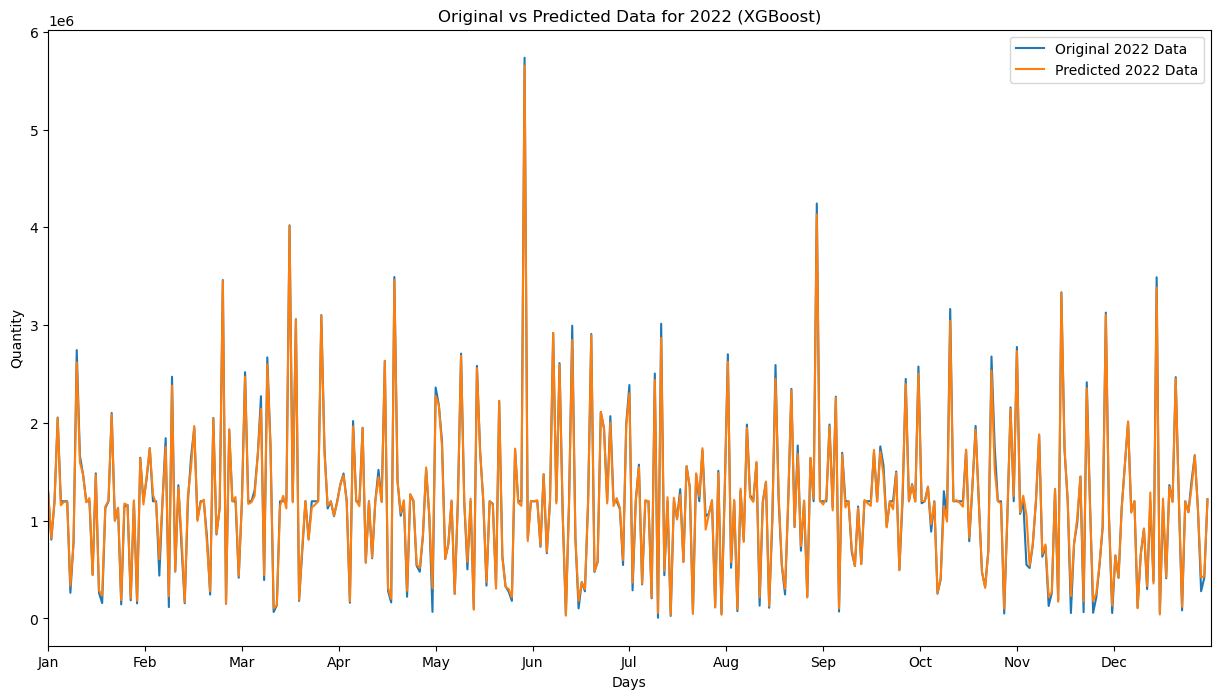

In [2]:
import matplotlib.pyplot as plt
original_data_2022 = df['2022'].tail(366).values
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(original_data_2022, label='Original 2022 Data')
plt.plot(forecast_2022, label='Predicted 2022 Data')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Original vs Predicted Data for 2022 (XGBoost)')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.legend()
plt.show()